# Geo-Spatial Clustering & Clustering using all features 

##  Importing important packages and libraries

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statistics
import seaborn as sns
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('D:/Deakin University (Applied AI (Professional)/SIT764- Team Project (A)/Datasets & Notebooks/Updated Dataset/reversegeocoded_lockdownstage.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,dev_id,name,date,total,left,left_avg,year,month,dayofweek,day,...,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,url,address,postcode,suburb,Lockdown_stage
0,hawk-013a4f,City Hall,2019-01-03T10:03:20+05:30,27.000000,14.000000,1.000000,2019.0,Jan,Thursday,3.0,...,20,9,14,20,20,"https://www.google.com/maps/place/-38.1474393,...","Gheringhap Street, Geelong CBD, City of Greate...",3218,Geelong CBD,others
1,hawk-013a4f,City Hall,2019-01-03T10:03:20+05:30,33.000000,13.000000,1.000000,2019.0,Jan,Thursday,3.0,...,20,9,14,20,20,"https://www.google.com/maps/place/-38.1474393,...","Gheringhap Street, Geelong CBD, City of Greate...",3218,Geelong CBD,others
2,hawk-013a51,Myer South side,2019-01-03T10:03:20+05:30,72.000000,23.000000,1.000000,2019.0,Jan,Thursday,3.0,...,19,7,12,20,20,"https://www.google.com/maps/place/-38.14762,14...","Myer, Malop Street, Geelong, City of Greater G...",3218,Geelong,others
3,hawk-013a23,LaPorcheta,2019-01-03T10:03:20+05:30,16.000000,14.000000,1.000000,2019.0,Jan,Thursday,3.0,...,19,10,15,20,20,"https://www.google.com/maps/place/-38.1469395,...","WDEA Works, 37, Malop Street, Geelong, City of...",3218,Geelong,others
4,hawk-013a23,LaPorcheta,2019-01-03T10:03:20+05:30,19.000000,10.000000,3.000000,2019.0,Jan,Thursday,3.0,...,19,10,15,20,20,"https://www.google.com/maps/place/-38.1469395,...","WDEA Works, 37, Malop Street, Geelong, City of...",3218,Geelong,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,014de9,"High Street , Belmont wifi/cctv cabinet",2021-12-07T11:30:00+05:30,202.000000,494.000000,13.872920,2021.0,Dec,Tuesday,7.0,...,0,3,8,20,2,"https://www.google.com/maps/place/-38.1746141,...","Busy Bee Fabrics, Belmont Centreway, Belmont, ...",3216,Belmont,Open
1059215,hawk-013a33,Ryrie/Moorabool Outside,2021-12-07T11:30:00+05:30,33.000000,45.000000,9.166667,2021.0,Dec,Tuesday,7.0,...,19,10,19,20,20,"https://www.google.com/maps/place/-38.1489155,...","Geelong CBD, City of Greater Geelong, Victoria...",3218,Geelong CBD,Open
1059216,meraki-e0-cb-bc-35-ae-29,Lt Malop West,2021-12-07T11:30:00+05:30,31.190542,67.596568,6.163429,2021.0,Dec,Tuesday,7.0,...,19,10,14,20,20,"https://www.google.com/maps/place/-38.147929,1...","74-78, Little Malop Street, Geelong, City of G...",3218,Geelong,Open
1059217,meraki-e0-cb-bc-35-bb-14,Waterfront - Pier,2021-12-07T11:30:00+05:30,31.190542,67.596568,6.163429,2021.0,Dec,Tuesday,7.0,...,20,8,13,20,20,"https://www.google.com/maps/place/-38.143364,1...","Port Phillip Ferries (Geelong-Docklands), Cunn...",3220,Cunningham Pier,Open


## Storing latest data samples from 6th & 7th December 2021

In [3]:
df_latest1 = df[(df['year']== 2021) & (df['month']== 'Dec') & (df['day']==6)] 

In [4]:
df_latest1

,dev_id,name,date,total,left,left_avg,year,month,dayofweek,day,...,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,url,address,postcode,suburb,Lockdown_stage
1049305,014d9b,smart node 7,2021-12-06T05:30:00+05:30,104.000000,211.000000,11.181845,2021.0,Dec,Monday,6.0,...,17,4,6,20,16,"https://www.google.com/maps/place/-38.1469338,...","Ritchie Boulevarde Rotunda No 5, Ritchie Boule...",3220,Geelong,Open
1049306,014d9e,Botanical Gardens - conservatory entrance,2021-12-06T05:30:00+05:30,0.000000,0.000000,0.000000,2021.0,Dec,Monday,6.0,...,16,0,2,20,3,"https://www.google.com/maps/place/-38.1494367,...","Botanic Garden Public Conservatory, Eastern Pa...",3219,East Geelong,Open
1049307,014da2,Rippleside Park,2021-12-06T05:30:00+05:30,18.000000,35.000000,16.666667,2021.0,Dec,Monday,6.0,...,0,0,0,1,0,https://www.google.com/maps/place/-38.11494912...,"The Esplanade, Indented Head, City of Greater ...",3223,Geelong CBD,Open
1049308,014dbe,St Albans reserve rotunda,2021-12-06T05:30:00+05:30,1.000000,0.000000,0.000000,2021.0,Dec,Monday,6.0,...,2,0,1,1,0,"https://www.google.com/maps/place/-38.1861465,...","Aldershot Reserve, Aldershot Road, St Albans P...",3219,St Albans Park,Open
1049309,014ddd,smart node 6,2021-12-06T05:30:00+05:30,0.000000,0.000000,0.000000,2021.0,Dec,Monday,6.0,...,18,5,10,20,18,"https://www.google.com/maps/place/-38.1467049,...","Ritchie Boulevarde Rotunda No 1, Ritchie Boule...",3220,Geelong,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059161,014ddb,st helens south end playground,2021-12-07T04:30:00+05:30,17.000000,44.000000,6.200000,2021.0,Dec,Tuesday,6.0,...,0,0,6,12,0,"https://www.google.com/maps/place/-38.1220226,...","Swinburne Street, Rippleside, City of Greater ...",3215,Rippleside,Open
1059162,014ddd,smart node 6,2021-12-07T04:30:00+05:30,0.000000,0.000000,0.000000,2021.0,Dec,Tuesday,6.0,...,18,5,10,20,18,"https://www.google.com/maps/place/-38.1467049,...","Ritchie Boulevarde Rotunda No 1, Ritchie Boule...",3220,Geelong,Open
1059163,hawk-013a51,Myer South side,2021-12-07T04:30:00+05:30,88.000000,118.000000,10.000000,2021.0,Dec,Tuesday,6.0,...,19,7,12,20,20,"https://www.google.com/maps/place/-38.14762,14...","Myer, Malop Street, Geelong, City of Greater G...",3218,Geelong,Open
1059164,meraki-e0-cb-bc-35-bd-d3,City Hall,2021-12-07T04:30:00+05:30,31.190542,67.596568,6.163429,2021.0,Dec,Tuesday,6.0,...,20,9,14,20,20,"https://www.google.com/maps/place/-38.147158,1...","Civic Centre Car Park, Tolmie Place, Geelong, ...",3218,Geelong,Open


In [5]:
df_latest1.columns

Index(['dev_id', 'name', 'date', 'total', 'left', 'left_avg', 'year', 'month',
       'dayofweek', 'day', 'location', 'latitude', 'longitude',
       'hospitals_count', 'libraries_count', 'gyms_count', 'restaurants_count',
       'malls_count', 'url', 'address', 'postcode', 'suburb',
       'Lockdown_stage'],
      dtype='object')

In [6]:
df_latest1 = df_latest1.drop(['date','dayofweek','location','url','address'], axis=1)

In [7]:
df_latest1

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage
1049305,014d9b,smart node 7,104.000000,211.000000,11.181845,2021.0,Dec,6.0,-38.146934,144.371125,17,4,6,20,16,3220,Geelong,Open
1049306,014d9e,Botanical Gardens - conservatory entrance,0.000000,0.000000,0.000000,2021.0,Dec,6.0,-38.149437,144.377461,16,0,2,20,3,3219,East Geelong,Open
1049307,014da2,Rippleside Park,18.000000,35.000000,16.666667,2021.0,Dec,6.0,-38.114949,144.672566,0,0,0,1,0,3223,Geelong CBD,Open
1049308,014dbe,St Albans reserve rotunda,1.000000,0.000000,0.000000,2021.0,Dec,6.0,-38.186146,144.393875,2,0,1,1,0,3219,St Albans Park,Open
1049309,014ddd,smart node 6,0.000000,0.000000,0.000000,2021.0,Dec,6.0,-38.146705,144.368400,18,5,10,20,18,3220,Geelong,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059161,014ddb,st helens south end playground,17.000000,44.000000,6.200000,2021.0,Dec,6.0,-38.122023,144.359141,0,0,6,12,0,3215,Rippleside,Open
1059162,014ddd,smart node 6,0.000000,0.000000,0.000000,2021.0,Dec,6.0,-38.146705,144.368400,18,5,10,20,18,3220,Geelong,Open
1059163,hawk-013a51,Myer South side,88.000000,118.000000,10.000000,2021.0,Dec,6.0,-38.147620,144.362275,19,7,12,20,20,3218,Geelong,Open
1059164,meraki-e0-cb-bc-35-bd-d3,City Hall,31.190542,67.596568,6.163429,2021.0,Dec,6.0,-38.147158,144.358161,20,9,14,20,20,3218,Geelong,Open


In [8]:
df_latest2 = df[(df['year']== 2021) & (df['month']== 'Dec') & (df['day']==7)] 

In [9]:
df_latest2

,dev_id,name,date,total,left,left_avg,year,month,dayofweek,day,...,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,url,address,postcode,suburb,Lockdown_stage
1051083,meraki-e0-cb-bc-35-b1-1a,Eastern Beach,2021-12-07T05:30:00+05:30,31.190542,67.596568,6.163429,2021.0,Dec,Tuesday,7.0,...,13,2,6,20,16,"https://www.google.com/maps/place/-38.147308,1...","Eastern Beach Amenities (lifeguard/pump), East...",3220,Geelong,Open
1051084,meraki-e0-cb-bc-35-b1-39,Waterfront - Steampacket,2021-12-07T05:30:00+05:30,31.190542,67.596568,6.163429,2021.0,Dec,Tuesday,7.0,...,19,7,17,20,19,"https://www.google.com/maps/place/-38.143849,1...","The Carousel, 1-11, Eastern Beach Road, Geelon...",3220,Geelong,Open
1051086,meraki-e0-cb-bc-35-b3-27,Malop Street,2021-12-07T05:30:00+05:30,31.190542,67.596568,6.163429,2021.0,Dec,Tuesday,7.0,...,20,8,12,20,20,"https://www.google.com/maps/place/-38.14768,14...","Market Square, Moorabool Street, Geelong, City...",3218,Geelong,Open
1051088,014d9b,smart node 7,2021-12-07T05:30:00+05:30,101.000000,186.000000,8.169890,2021.0,Dec,Tuesday,7.0,...,17,4,6,20,16,"https://www.google.com/maps/place/-38.1469338,...","Ritchie Boulevarde Rotunda No 5, Ritchie Boule...",3220,Geelong,Open
1051090,014dbe,St Albans reserve rotunda,2021-12-07T05:30:00+05:30,0.000000,0.000000,0.000000,2021.0,Dec,Tuesday,7.0,...,2,0,1,1,0,"https://www.google.com/maps/place/-38.1861465,...","Aldershot Reserve, Aldershot Road, St Albans P...",3219,St Albans Park,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,014de9,"High Street , Belmont wifi/cctv cabinet",2021-12-07T11:30:00+05:30,202.000000,494.000000,13.872920,2021.0,Dec,Tuesday,7.0,...,0,3,8,20,2,"https://www.google.com/maps/place/-38.1746141,...","Busy Bee Fabrics, Belmont Centreway, Belmont, ...",3216,Belmont,Open
1059215,hawk-013a33,Ryrie/Moorabool Outside,2021-12-07T11:30:00+05:30,33.000000,45.000000,9.166667,2021.0,Dec,Tuesday,7.0,...,19,10,19,20,20,"https://www.google.com/maps/place/-38.1489155,...","Geelong CBD, City of Greater Geelong, Victoria...",3218,Geelong CBD,Open
1059216,meraki-e0-cb-bc-35-ae-29,Lt Malop West,2021-12-07T11:30:00+05:30,31.190542,67.596568,6.163429,2021.0,Dec,Tuesday,7.0,...,19,10,14,20,20,"https://www.google.com/maps/place/-38.147929,1...","74-78, Little Malop Street, Geelong, City of G...",3218,Geelong,Open
1059217,meraki-e0-cb-bc-35-bb-14,Waterfront - Pier,2021-12-07T11:30:00+05:30,31.190542,67.596568,6.163429,2021.0,Dec,Tuesday,7.0,...,20,8,13,20,20,"https://www.google.com/maps/place/-38.143364,1...","Port Phillip Ferries (Geelong-Docklands), Cunn...",3220,Cunningham Pier,Open


In [10]:
df_latest2.columns

Index(['dev_id', 'name', 'date', 'total', 'left', 'left_avg', 'year', 'month',
       'dayofweek', 'day', 'location', 'latitude', 'longitude',
       'hospitals_count', 'libraries_count', 'gyms_count', 'restaurants_count',
       'malls_count', 'url', 'address', 'postcode', 'suburb',
       'Lockdown_stage'],
      dtype='object')

In [11]:
df_latest2 = df_latest2.drop(['date','dayofweek','location','url','address'], axis=1)

In [12]:
df_latest2

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage
1051083,meraki-e0-cb-bc-35-b1-1a,Eastern Beach,31.190542,67.596568,6.163429,2021.0,Dec,7.0,-38.147308,144.373781,13,2,6,20,16,3220,Geelong,Open
1051084,meraki-e0-cb-bc-35-b1-39,Waterfront - Steampacket,31.190542,67.596568,6.163429,2021.0,Dec,7.0,-38.143849,144.362906,19,7,17,20,19,3220,Geelong,Open
1051086,meraki-e0-cb-bc-35-b3-27,Malop Street,31.190542,67.596568,6.163429,2021.0,Dec,7.0,-38.147680,144.361951,20,8,12,20,20,3218,Geelong,Open
1051088,014d9b,smart node 7,101.000000,186.000000,8.169890,2021.0,Dec,7.0,-38.146934,144.371125,17,4,6,20,16,3220,Geelong,Open
1051090,014dbe,St Albans reserve rotunda,0.000000,0.000000,0.000000,2021.0,Dec,7.0,-38.186146,144.393875,2,0,1,1,0,3219,St Albans Park,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,014de9,"High Street , Belmont wifi/cctv cabinet",202.000000,494.000000,13.872920,2021.0,Dec,7.0,-38.174614,144.343068,0,3,8,20,2,3216,Belmont,Open
1059215,hawk-013a33,Ryrie/Moorabool Outside,33.000000,45.000000,9.166667,2021.0,Dec,7.0,-38.148916,144.358449,19,10,19,20,20,3218,Geelong CBD,Open
1059216,meraki-e0-cb-bc-35-ae-29,Lt Malop West,31.190542,67.596568,6.163429,2021.0,Dec,7.0,-38.147929,144.358854,19,10,14,20,20,3218,Geelong,Open
1059217,meraki-e0-cb-bc-35-bb-14,Waterfront - Pier,31.190542,67.596568,6.163429,2021.0,Dec,7.0,-38.143364,144.361926,20,8,13,20,20,3220,Cunningham Pier,Open


In [13]:
df_latest = df_latest1.append(df_latest2)

In [14]:
df_latest

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage
1049305,014d9b,smart node 7,104.000000,211.000000,11.181845,2021.0,Dec,6.0,-38.146934,144.371125,17,4,6,20,16,3220,Geelong,Open
1049306,014d9e,Botanical Gardens - conservatory entrance,0.000000,0.000000,0.000000,2021.0,Dec,6.0,-38.149437,144.377461,16,0,2,20,3,3219,East Geelong,Open
1049307,014da2,Rippleside Park,18.000000,35.000000,16.666667,2021.0,Dec,6.0,-38.114949,144.672566,0,0,0,1,0,3223,Geelong CBD,Open
1049308,014dbe,St Albans reserve rotunda,1.000000,0.000000,0.000000,2021.0,Dec,6.0,-38.186146,144.393875,2,0,1,1,0,3219,St Albans Park,Open
1049309,014ddd,smart node 6,0.000000,0.000000,0.000000,2021.0,Dec,6.0,-38.146705,144.368400,18,5,10,20,18,3220,Geelong,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,014de9,"High Street , Belmont wifi/cctv cabinet",202.000000,494.000000,13.872920,2021.0,Dec,7.0,-38.174614,144.343068,0,3,8,20,2,3216,Belmont,Open
1059215,hawk-013a33,Ryrie/Moorabool Outside,33.000000,45.000000,9.166667,2021.0,Dec,7.0,-38.148916,144.358449,19,10,19,20,20,3218,Geelong CBD,Open
1059216,meraki-e0-cb-bc-35-ae-29,Lt Malop West,31.190542,67.596568,6.163429,2021.0,Dec,7.0,-38.147929,144.358854,19,10,14,20,20,3218,Geelong,Open
1059217,meraki-e0-cb-bc-35-bb-14,Waterfront - Pier,31.190542,67.596568,6.163429,2021.0,Dec,7.0,-38.143364,144.361926,20,8,13,20,20,3220,Cunningham Pier,Open


In [15]:
df_latest['left_avg'] = df_latest['left_avg'].round(1)
df_latest['total'] = df_latest['total'].round(1)
df_latest['left'] = df_latest['left'].round(1)
df_latest

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage
1049305,014d9b,smart node 7,104.0,211.0,11.2,2021.0,Dec,6.0,-38.146934,144.371125,17,4,6,20,16,3220,Geelong,Open
1049306,014d9e,Botanical Gardens - conservatory entrance,0.0,0.0,0.0,2021.0,Dec,6.0,-38.149437,144.377461,16,0,2,20,3,3219,East Geelong,Open
1049307,014da2,Rippleside Park,18.0,35.0,16.7,2021.0,Dec,6.0,-38.114949,144.672566,0,0,0,1,0,3223,Geelong CBD,Open
1049308,014dbe,St Albans reserve rotunda,1.0,0.0,0.0,2021.0,Dec,6.0,-38.186146,144.393875,2,0,1,1,0,3219,St Albans Park,Open
1049309,014ddd,smart node 6,0.0,0.0,0.0,2021.0,Dec,6.0,-38.146705,144.368400,18,5,10,20,18,3220,Geelong,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,014de9,"High Street , Belmont wifi/cctv cabinet",202.0,494.0,13.9,2021.0,Dec,7.0,-38.174614,144.343068,0,3,8,20,2,3216,Belmont,Open
1059215,hawk-013a33,Ryrie/Moorabool Outside,33.0,45.0,9.2,2021.0,Dec,7.0,-38.148916,144.358449,19,10,19,20,20,3218,Geelong CBD,Open
1059216,meraki-e0-cb-bc-35-ae-29,Lt Malop West,31.2,67.6,6.2,2021.0,Dec,7.0,-38.147929,144.358854,19,10,14,20,20,3218,Geelong,Open
1059217,meraki-e0-cb-bc-35-bb-14,Waterfront - Pier,31.2,67.6,6.2,2021.0,Dec,7.0,-38.143364,144.361926,20,8,13,20,20,3220,Cunningham Pier,Open


In [16]:
df_latest.to_csv('D:/Deakin University (Applied AI (Professional)/SIT764- Team Project (A)/Datasets & Notebooks/Updated Dataset/dec_latest_data_new.csv')
print('Latest Data CSV file has been saved sccessfully')

Latest Data CSV file has been saved sccessfully


In [17]:
# checking for null values 
null_val = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / len(df) * (100)})
null_val

,Null Values,Percentage Null Values
dev_id,0,0.0
name,0,0.0
date,0,0.0
total,0,0.0
left,0,0.0
left_avg,0,0.0
year,0,0.0
month,0,0.0
dayofweek,0,0.0
day,0,0.0


In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
print('Number of numerical columns are:', len(numeric_df.columns))
numeric_df

Number of numerical columns are: 13


,total,left,left_avg,year,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode
0,27.000000,14.000000,1.000000,2019.0,3.0,-38.147439,144.357692,20,9,14,20,20,3218
1,33.000000,13.000000,1.000000,2019.0,3.0,-38.147439,144.357692,20,9,14,20,20,3218
2,72.000000,23.000000,1.000000,2019.0,3.0,-38.147620,144.362275,19,7,12,20,20,3218
3,16.000000,14.000000,1.000000,2019.0,3.0,-38.146940,144.359936,19,10,15,20,20,3218
4,19.000000,10.000000,3.000000,2019.0,3.0,-38.146940,144.359936,19,10,15,20,20,3218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,202.000000,494.000000,13.872920,2021.0,7.0,-38.174614,144.343068,0,3,8,20,2,3216
1059215,33.000000,45.000000,9.166667,2021.0,7.0,-38.148916,144.358449,19,10,19,20,20,3218
1059216,31.190542,67.596568,6.163429,2021.0,7.0,-38.147929,144.358854,19,10,14,20,20,3218
1059217,31.190542,67.596568,6.163429,2021.0,7.0,-38.143364,144.361926,20,8,13,20,20,3220


In [19]:
# displaying the columns of the dataset 
pd.set_option("display.max_columns", None)
df.head(1)

,dev_id,name,date,total,left,left_avg,year,month,dayofweek,day,location,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,url,address,postcode,suburb,Lockdown_stage
0,hawk-013a4f,City Hall,2019-01-03T10:03:20+05:30,27.0,14.0,1.0,2019.0,Jan,Thursday,3.0,"-38.1474393,144.3576924",-38.147439,144.357692,20,9,14,20,20,"https://www.google.com/maps/place/-38.1474393,...","Gheringhap Street, Geelong CBD, City of Greate...",3218,Geelong CBD,others


In [20]:
# Checking unique values in 'dev_id'
df['dev_id'].value_counts()

hawk-013a4f                 84184
hawk-013a21                 75755
hawk-013a33                 68778
hawk-013a20                 66285
hawk-013a51                 66119
hawk-013a1f                 58953
014dc6                      56773
014d98                      54504
014ddb                      54033
014db4                      48912
014de9                      44168
014d9e                      40221
014daa                      39686
014ddd                      38783
hawk-013a22                 37159
014de5                      37029
014d9b                      36619
hawk-013a2c                 35027
hawk-013a23                 26575
hawk-013a2e                 26504
014dbe                      23153
014d9a                       6865
hawk-013a1e                  4054
hawk-013a31                  3902
meraki-e0-cb-bc-35-b3-27     3499
meraki-e0-cb-bc-35-be-84     3499
meraki-e0-cb-bc-35-bb-14     3498
meraki-e0-cb-bc-35-bd-d3     3494
meraki-e0-cb-bc-35-ae-29     3494
meraki-e0-cb-b

In [21]:
# Checking unique values in 'name'
df['name'].value_counts()

City Hall                                                  87678
155 Mercer Foyer                                           75755
Ryrie/Moorabool Outside                                    68778
Busport Project office                                     66285
Myer South side                                            66119
Botanical Gardens - Heritage gate                          58953
Little Malop and James - CCTV/wifi cabinet                 56773
Barwon Valley Activity Centre - South Car Park entrance    54504
st helens south end playground                             54033
rippleside north end near gym                              48912
High Street , Belmont wifi/cctv cabinet                    44168
Botanical Gardens - conservatory entrance                  40221
Barwon Valley Activity Centre - Entrance                   39686
smart node 6                                               38783
Ryrie /Union Outside                                       37159
smart node 2             

In [22]:
# Checking unique values in 'month'
df['month'].value_counts()

May    114635
Apr    106224
Mar    103358
Oct     93673
Dec     93427
Jan     87469
Sep     82101
Aug     81651
Jun     79138
Feb     78659
Nov     73939
Jul     64945
Name: month, dtype: int64

In [23]:
# Checking unique values in 'address'
df['address'].value_counts()

Barwon Valley Activity Centre, 1, Barwon Heads Road, Belmont, City of Greater Geelong, Victoria, 3216, Australia              101055
Gheringhap Street, Geelong CBD, City of Greater Geelong, Victoria, 3218, Australia                                             84184
155, Mercer Street, Geelong, City of Greater Geelong, Victoria, 3218, Australia                                                75755
Bubble Bar, 188, Ryrie Street, Geelong, City of Greater Geelong, Victoria, 3218, Australia                                     72186
Geelong CBD, City of Greater Geelong, Victoria, 3218, Australia                                                                68778
Busport, Brougham Street, Geelong, City of Greater Geelong, Victoria, 3218, Australia                                          66285
Myer, Malop Street, Geelong, City of Greater Geelong, Victoria, 3218, Australia                                                66119
74-78, Little Malop Street, Geelong, City of Greater Geelong, Victori

In [24]:
# Checking unique values in 'postcode'
df['postcode'].value_counts()

3218    565101
3216    145223
3220    122665
3219    122327
3215    102945
3223       958
Name: postcode, dtype: int64

In [25]:
# Checking unique values in 'suburb'
df['suburb'].value_counts()

Geelong            490778
Geelong CBD        157419
Belmont            145223
Rippleside         102945
East Geelong        99174
Cunningham Pier     40527
St Albans Park      23153
Name: suburb, dtype: int64

In [26]:
# Checking unique values in 'Lockdown_stage'
df['Lockdown_stage'].value_counts()

others        668297
Lockdown-2    221323
Lockdown-1     88509
Lockdown-6     41575
Open           25672
Lockdown-5      6547
Lockdown-4      5376
Lockdown-3      1920
Name: Lockdown_stage, dtype: int64

In [27]:
geo_df = df.copy()

In [28]:
geo_df['left_avg'] = geo_df['left_avg'].round(1)
geo_df['total'] = geo_df['total'].round(1)
geo_df['left'] = geo_df['left'].round(1)
geo_df

,dev_id,name,date,total,left,left_avg,year,month,dayofweek,day,location,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,url,address,postcode,suburb,Lockdown_stage
0,hawk-013a4f,City Hall,2019-01-03T10:03:20+05:30,27.0,14.0,1.0,2019.0,Jan,Thursday,3.0,"-38.1474393,144.3576924",-38.147439,144.357692,20,9,14,20,20,"https://www.google.com/maps/place/-38.1474393,...","Gheringhap Street, Geelong CBD, City of Greate...",3218,Geelong CBD,others
1,hawk-013a4f,City Hall,2019-01-03T10:03:20+05:30,33.0,13.0,1.0,2019.0,Jan,Thursday,3.0,"-38.1474393,144.3576924",-38.147439,144.357692,20,9,14,20,20,"https://www.google.com/maps/place/-38.1474393,...","Gheringhap Street, Geelong CBD, City of Greate...",3218,Geelong CBD,others
2,hawk-013a51,Myer South side,2019-01-03T10:03:20+05:30,72.0,23.0,1.0,2019.0,Jan,Thursday,3.0,"-38.14762,144.3622749",-38.147620,144.362275,19,7,12,20,20,"https://www.google.com/maps/place/-38.14762,14...","Myer, Malop Street, Geelong, City of Greater G...",3218,Geelong,others
3,hawk-013a23,LaPorcheta,2019-01-03T10:03:20+05:30,16.0,14.0,1.0,2019.0,Jan,Thursday,3.0,"-38.1469395,144.3599357",-38.146940,144.359936,19,10,15,20,20,"https://www.google.com/maps/place/-38.1469395,...","WDEA Works, 37, Malop Street, Geelong, City of...",3218,Geelong,others
4,hawk-013a23,LaPorcheta,2019-01-03T10:03:20+05:30,19.0,10.0,3.0,2019.0,Jan,Thursday,3.0,"-38.1469395,144.3599357",-38.146940,144.359936,19,10,15,20,20,"https://www.google.com/maps/place/-38.1469395,...","WDEA Works, 37, Malop Street, Geelong, City of...",3218,Geelong,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,014de9,"High Street , Belmont wifi/cctv cabinet",2021-12-07T11:30:00+05:30,202.0,494.0,13.9,2021.0,Dec,Tuesday,7.0,"-38.1746141,144.3430678",-38.174614,144.343068,0,3,8,20,2,"https://www.google.com/maps/place/-38.1746141,...","Busy Bee Fabrics, Belmont Centreway, Belmont, ...",3216,Belmont,Open
1059215,hawk-013a33,Ryrie/Moorabool Outside,2021-12-07T11:30:00+05:30,33.0,45.0,9.2,2021.0,Dec,Tuesday,7.0,"-38.1489155,144.3584489",-38.148916,144.358449,19,10,19,20,20,"https://www.google.com/maps/place/-38.1489155,...","Geelong CBD, City of Greater Geelong, Victoria...",3218,Geelong CBD,Open
1059216,meraki-e0-cb-bc-35-ae-29,Lt Malop West,2021-12-07T11:30:00+05:30,31.2,67.6,6.2,2021.0,Dec,Tuesday,7.0,"-38.147929,144.358854",-38.147929,144.358854,19,10,14,20,20,"https://www.google.com/maps/place/-38.147929,1...","74-78, Little Malop Street, Geelong, City of G...",3218,Geelong,Open
1059217,meraki-e0-cb-bc-35-bb-14,Waterfront - Pier,2021-12-07T11:30:00+05:30,31.2,67.6,6.2,2021.0,Dec,Tuesday,7.0,"-38.143364,144.361926",-38.143364,144.361926,20,8,13,20,20,"https://www.google.com/maps/place/-38.143364,1...","Port Phillip Ferries (Geelong-Docklands), Cunn...",3220,Cunningham Pier,Open


In [29]:
geo_df = geo_df.drop(['location','url','dayofweek','date','address'], axis=1)

In [30]:
geo_df

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage
0,hawk-013a4f,City Hall,27.0,14.0,1.0,2019.0,Jan,3.0,-38.147439,144.357692,20,9,14,20,20,3218,Geelong CBD,others
1,hawk-013a4f,City Hall,33.0,13.0,1.0,2019.0,Jan,3.0,-38.147439,144.357692,20,9,14,20,20,3218,Geelong CBD,others
2,hawk-013a51,Myer South side,72.0,23.0,1.0,2019.0,Jan,3.0,-38.147620,144.362275,19,7,12,20,20,3218,Geelong,others
3,hawk-013a23,LaPorcheta,16.0,14.0,1.0,2019.0,Jan,3.0,-38.146940,144.359936,19,10,15,20,20,3218,Geelong,others
4,hawk-013a23,LaPorcheta,19.0,10.0,3.0,2019.0,Jan,3.0,-38.146940,144.359936,19,10,15,20,20,3218,Geelong,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,014de9,"High Street , Belmont wifi/cctv cabinet",202.0,494.0,13.9,2021.0,Dec,7.0,-38.174614,144.343068,0,3,8,20,2,3216,Belmont,Open
1059215,hawk-013a33,Ryrie/Moorabool Outside,33.0,45.0,9.2,2021.0,Dec,7.0,-38.148916,144.358449,19,10,19,20,20,3218,Geelong CBD,Open
1059216,meraki-e0-cb-bc-35-ae-29,Lt Malop West,31.2,67.6,6.2,2021.0,Dec,7.0,-38.147929,144.358854,19,10,14,20,20,3218,Geelong,Open
1059217,meraki-e0-cb-bc-35-bb-14,Waterfront - Pier,31.2,67.6,6.2,2021.0,Dec,7.0,-38.143364,144.361926,20,8,13,20,20,3220,Cunningham Pier,Open


In [31]:
# Performing label encoding on required features
from sklearn import preprocessing

categ = ['dev_id', 'name', 'month', 'day', 'year', 'postcode', 'Lockdown_stage', 'suburb']

label_encoder = preprocessing.LabelEncoder()

geo_df[categ] = geo_df[categ].apply(label_encoder.fit_transform)

In [32]:
geo_df

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage
0,23,7,27.0,14.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7
1,23,7,33.0,13.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7
2,24,18,72.0,23.0,1.0,1,4,2,-38.147620,144.362275,19,7,12,20,20,2,3,7
3,18,12,16.0,14.0,1.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7
4,18,12,19.0,10.0,3.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,-38.174614,144.343068,0,3,8,20,2,1,0,6
1059215,22,22,33.0,45.0,9.2,3,2,6,-38.148916,144.358449,19,10,19,20,20,2,4,6
1059216,25,15,31.2,67.6,6.2,3,2,6,-38.147929,144.358854,19,10,14,20,20,2,3,6
1059217,29,24,31.2,67.6,6.2,3,2,6,-38.143364,144.361926,20,8,13,20,20,4,1,6


<AxesSubplot:>

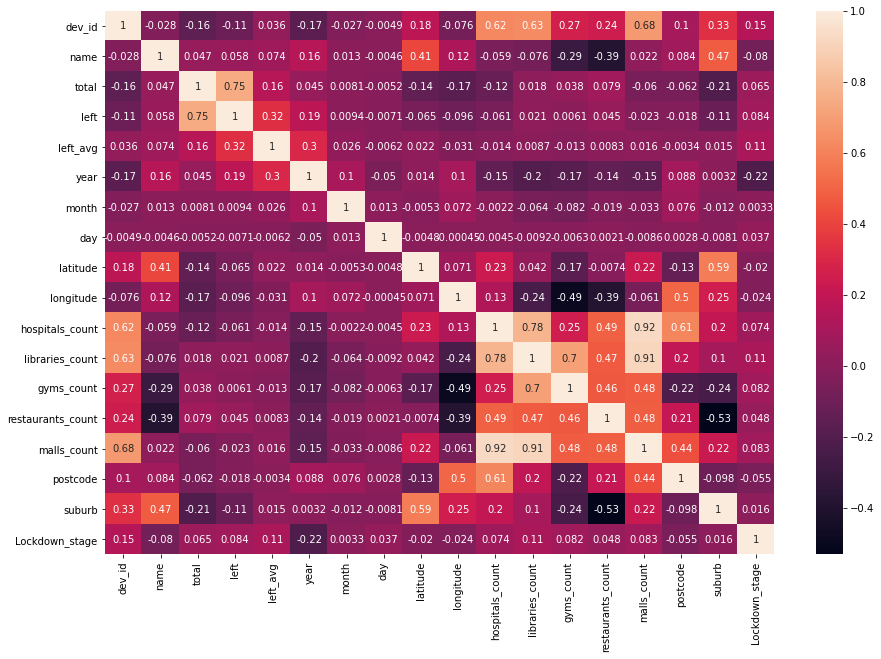

In [33]:
#Correlation matrix
geo_df.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(geo_df.corr(), annot = True)

In [34]:
correlation = geo_df.corr()['total'].abs().sort_values(ascending = False)
correlation

total                1.000000
left                 0.747195
suburb               0.210425
longitude            0.169844
left_avg             0.159147
dev_id               0.159014
latitude             0.143721
hospitals_count      0.122369
restaurants_count    0.079493
Lockdown_stage       0.065022
postcode             0.062194
malls_count          0.060127
name                 0.047436
year                 0.044978
gyms_count           0.037762
libraries_count      0.018177
month                0.008051
day                  0.005177
Name: total, dtype: float64

### Splitting dataset into 'Features (X)' & 'Target (y)' variables for Geo-spatial clustering

In [35]:
X = geo_df[['latitude','longitude']].values
y = geo_df['total']

## Clustering using spatial data


For cluster = 1, SSE/WCSS is 348.10937094583693
For cluster = 2, SSE/WCSS is 227.9974035970381
For cluster = 3, SSE/WCSS is 134.94460161170286
For cluster = 4, SSE/WCSS is 84.87807481244988
For cluster = 5, SSE/WCSS is 39.40113161576931
For cluster = 6, SSE/WCSS is 10.546722457693091
For cluster = 7, SSE/WCSS is 7.536159438928976
For cluster = 8, SSE/WCSS is 4.900875735212079
For cluster = 9, SSE/WCSS is 3.539955142569235
For cluster = 10, SSE/WCSS is 2.3372777955766773


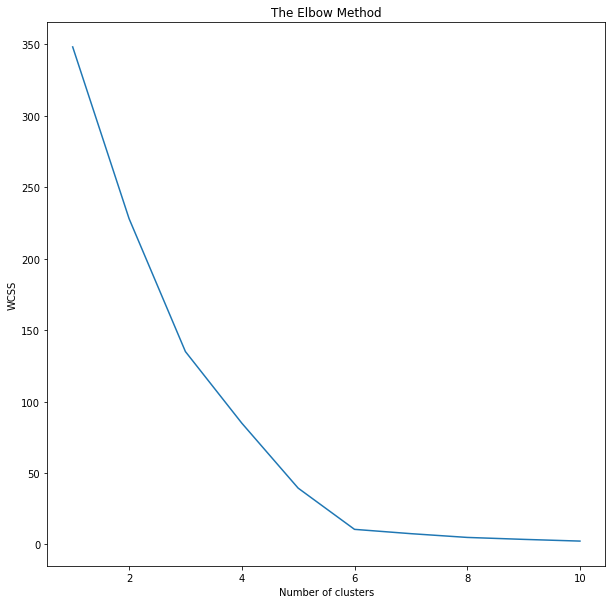

In [36]:
wcss = [] # Within cluster sum of squares (WCSS)
sse = {}

for i in range(1,11):
    model_geo = KMeans(n_clusters = i, init = "k-means++")
    model_geo.fit(X)
    wcss.append(model_geo.inertia_)
    sse[i] = model_geo.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))
  
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

5

In [38]:
cluster_Kmeans = KMeans(n_clusters=5, init = "k-means++")
model_kmeans = cluster_Kmeans.fit(X)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

[1 1 1 ... 1 1 1]


{0: 102945, 1: 786940, 2: 23153, 3: 145223, 4: 958}

No handles with labels found to put in legend.


K Means Output Cluster Frequency {0: 102945, 1: 786940, 2: 23153, 3: 145223, 4: 958}


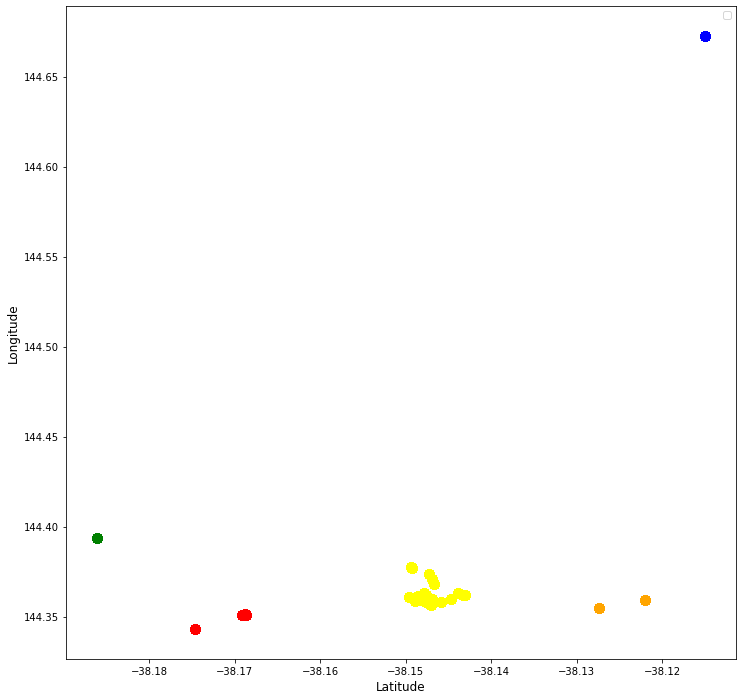

In [39]:
# Visualizing Output

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
print('K Means Output Cluster Frequency',dict(zip(unique, counts)))

# In the above output we got value labels: ‘0’, ‘1’, ‘2’, '3' & '4'
# For a better understanding, we can visualize these clusters.
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

plt.scatter(X[pred_kmeans == 0, 0], X[pred_kmeans == 0, 1], 
            s = 80, c = 'orange')
plt.scatter(X[pred_kmeans == 1, 0], X[pred_kmeans == 1, 1], 
            s = 80, c = 'yellow')
plt.scatter(X[pred_kmeans == 2, 0], X[pred_kmeans == 2, 1], 
            s = 80, c = 'green')
plt.scatter(X[pred_kmeans == 3, 0], X[pred_kmeans == 3, 1], 
            s = 80, c = 'red')
plt.scatter(X[pred_kmeans == 4, 0], X[pred_kmeans == 4, 1], 
            s = 80, c = 'blue')
plt.legend()

## Clustering using all the Features except target feature


In [40]:
M = geo_df.drop(['total'], axis=1) #features
N = geo_df['total'] #target feature

In [41]:
M = M.values

In [42]:
N

0           27.0
1           33.0
2           72.0
3           16.0
4           19.0
           ...  
1059214    202.0
1059215     33.0
1059216     31.2
1059217     31.2
1059218     31.2
Name: total, Length: 1059219, dtype: float64

For cluster = 1, SSE/WCSS is 5598821360.008539
For cluster = 2, SSE/WCSS is 2752247624.428795
For cluster = 3, SSE/WCSS is 1456550986.1965275
For cluster = 4, SSE/WCSS is 1064567617.865663
For cluster = 5, SSE/WCSS is 839471055.5859861
For cluster = 6, SSE/WCSS is 696387316.7631181
For cluster = 7, SSE/WCSS is 605966189.3815308
For cluster = 8, SSE/WCSS is 545413387.9847933
For cluster = 9, SSE/WCSS is 498667794.06414527
For cluster = 10, SSE/WCSS is 457298233.4865752


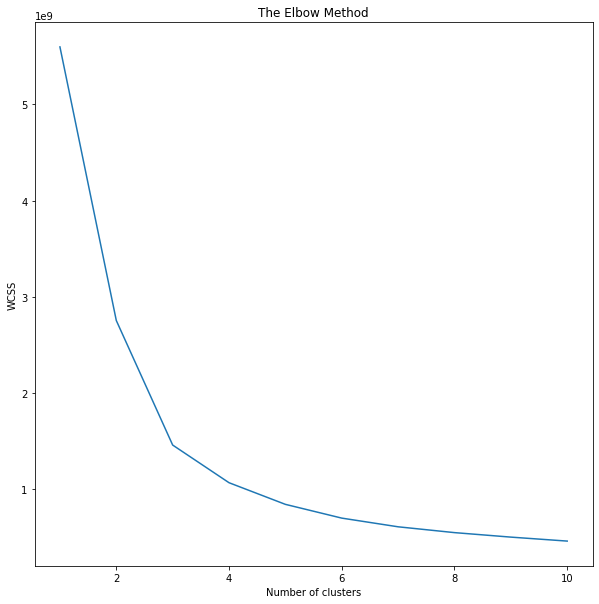

In [43]:
wcss = [] # Within cluster sum of squares (WCSS)
sse = {}

for i in range(1,11):
    model_new_geo = KMeans(n_clusters = i, init = "k-means++")
    model_new_geo.fit(M)
    wcss.append(model_new_geo.inertia_)
    sse[i] = model_new_geo.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))
  
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print('Best K-value (using KneeLocator) utilizing k-means:',kl.elbow)

Best K-value (using KneeLocator) utilizing k-means: 3


In [45]:
centers = np.array(model_new_geo.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++",  max_iter = 50, n_init = 10, random_state = 0)
clustered_data = model.fit_predict(M)

In [46]:
predict_kmeans = model.labels_
print(predict_kmeans)

[0 0 0 ... 0 0 0]


In [47]:
# Frequency count of the Output clusters
unique, counts = np.unique(predict_kmeans, return_counts=True)
print('Unique sample counts per cluster:', dict(zip(unique, counts)))

Unique sample counts per cluster: {0: 985725, 1: 5776, 2: 67718}


## Cluster Analysis


In [48]:
#Append the prediction 
geo_df["Clusters"] = clustered_data
print("Clusters Assigned : \n")
geo_df.head()

Clusters Assigned : 



,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,23,7,27.0,14.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0
1,23,7,33.0,13.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0
2,24,18,72.0,23.0,1.0,1,4,2,-38.147620,144.362275,19,7,12,20,20,2,3,7,0
3,18,12,16.0,14.0,1.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0
4,18,12,19.0,10.0,3.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0


In [49]:
mapping = {0:'Sparse', 1:'Dense', 2:'Normal'}

In [50]:
clus_type = geo_df[['Clusters']]
clus_type['cluster_type'] = clus_type['Clusters'].replace(mapping)

In [51]:
geo_df['cluster_type'] = clus_type['cluster_type']

In [52]:
geo_df.head()

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters,cluster_type
0,23,7,27.0,14.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
1,23,7,33.0,13.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
2,24,18,72.0,23.0,1.0,1,4,2,-38.147620,144.362275,19,7,12,20,20,2,3,7,0,Sparse
3,18,12,16.0,14.0,1.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse
4,18,12,19.0,10.0,3.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse


In [53]:
geo_df_cluster_new = geo_df.groupby(['Clusters'])
geo_df_cluster_new.mean()

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage
Clusters,,,,,,,,,,,,,,,,,,
0,13.831516,13.769877,16.966584,12.439861,1.178611,1.851567,5.469220,14.949214,-38.148835,144.361665,14.185488,5.893152,12.586217,18.946436,13.787242,2.030541,2.883041,4.956553
1,8.030817,15.645949,247.859072,709.768525,11.116586,2.761427,5.356994,14.416724,-38.151381,144.358121,15.355090,7.484938,12.463816,19.817867,15.705159,2.160145,2.408414,6.609938
2,9.308943,15.155025,144.879338,162.178933,5.379543,2.162911,5.577542,14.735299,-38.153707,144.356163,10.518075,5.490682,12.210638,19.314141,11.196639,1.828524,2.048658,5.663014


In [54]:
geo_df

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters,cluster_type
0,23,7,27.0,14.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
1,23,7,33.0,13.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
2,24,18,72.0,23.0,1.0,1,4,2,-38.147620,144.362275,19,7,12,20,20,2,3,7,0,Sparse
3,18,12,16.0,14.0,1.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse
4,18,12,19.0,10.0,3.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,-38.174614,144.343068,0,3,8,20,2,1,0,6,1,Dense
1059215,22,22,33.0,45.0,9.2,3,2,6,-38.148916,144.358449,19,10,19,20,20,2,4,6,0,Sparse
1059216,25,15,31.2,67.6,6.2,3,2,6,-38.147929,144.358854,19,10,14,20,20,2,3,6,0,Sparse
1059217,29,24,31.2,67.6,6.2,3,2,6,-38.143364,144.361926,20,8,13,20,20,4,1,6,0,Sparse


In [55]:
# Checking unique value of 'cluster_type'
geo_df['cluster_type'].value_counts()

Sparse    985725
Normal     67718
Dense       5776
Name: cluster_type, dtype: int64

In [56]:
geo_df1 = geo_df.copy()

In [57]:
geo_df1

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters,cluster_type
0,23,7,27.0,14.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
1,23,7,33.0,13.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
2,24,18,72.0,23.0,1.0,1,4,2,-38.147620,144.362275,19,7,12,20,20,2,3,7,0,Sparse
3,18,12,16.0,14.0,1.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse
4,18,12,19.0,10.0,3.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,-38.174614,144.343068,0,3,8,20,2,1,0,6,1,Dense
1059215,22,22,33.0,45.0,9.2,3,2,6,-38.148916,144.358449,19,10,19,20,20,2,4,6,0,Sparse
1059216,25,15,31.2,67.6,6.2,3,2,6,-38.147929,144.358854,19,10,14,20,20,2,3,6,0,Sparse
1059217,29,24,31.2,67.6,6.2,3,2,6,-38.143364,144.361926,20,8,13,20,20,4,1,6,0,Sparse


In [58]:
geo_df1 = geo_df1.drop(['dev_id','name','year','month','day','latitude','longitude','postcode','suburb'], axis=1)
geo_df1

,total,left,left_avg,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,Lockdown_stage,Clusters,cluster_type
0,27.0,14.0,1.0,20,9,14,20,20,7,0,Sparse
1,33.0,13.0,1.0,20,9,14,20,20,7,0,Sparse
2,72.0,23.0,1.0,19,7,12,20,20,7,0,Sparse
3,16.0,14.0,1.0,19,10,15,20,20,7,0,Sparse
4,19.0,10.0,3.0,19,10,15,20,20,7,0,Sparse
...,...,...,...,...,...,...,...,...,...,...,...
1059214,202.0,494.0,13.9,0,3,8,20,2,6,1,Dense
1059215,33.0,45.0,9.2,19,10,19,20,20,6,0,Sparse
1059216,31.2,67.6,6.2,19,10,14,20,20,6,0,Sparse
1059217,31.2,67.6,6.2,20,8,13,20,20,6,0,Sparse


In [59]:
geo_df1_clus = geo_df1.groupby(['Clusters'])
geo_df1_clus.mean()

,total,left,left_avg,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,Lockdown_stage
Clusters,,,,,,,,,
0,16.966584,12.439861,1.178611,14.185488,5.893152,12.586217,18.946436,13.787242,4.956553
1,247.859072,709.768525,11.116586,15.355090,7.484938,12.463816,19.817867,15.705159,6.609938
2,144.879338,162.178933,5.379543,10.518075,5.490682,12.210638,19.314141,11.196639,5.663014


## Saving the dataset into a CSV file 

In [60]:
geo_df1.to_csv('D:/Deakin University (Applied AI (Professional)/SIT764- Team Project (A)/Datasets & Notebooks/Updated Dataset/updated_clustered_data.csv')
print('Clustered CSV file has been saved sccessfully')

Clustered CSV file has been saved sccessfully


## Features which will be used for Tableau Visualization

In [61]:
geo_df2 = geo_df.copy()

In [62]:
geo_df2

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters,cluster_type
0,23,7,27.0,14.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
1,23,7,33.0,13.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
2,24,18,72.0,23.0,1.0,1,4,2,-38.147620,144.362275,19,7,12,20,20,2,3,7,0,Sparse
3,18,12,16.0,14.0,1.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse
4,18,12,19.0,10.0,3.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,-38.174614,144.343068,0,3,8,20,2,1,0,6,1,Dense
1059215,22,22,33.0,45.0,9.2,3,2,6,-38.148916,144.358449,19,10,19,20,20,2,4,6,0,Sparse
1059216,25,15,31.2,67.6,6.2,3,2,6,-38.147929,144.358854,19,10,14,20,20,2,3,6,0,Sparse
1059217,29,24,31.2,67.6,6.2,3,2,6,-38.143364,144.361926,20,8,13,20,20,4,1,6,0,Sparse


In [63]:
geo_df2 = geo_df2.drop(['cluster_type'], axis=1)
geo_df2

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,23,7,27.0,14.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0
1,23,7,33.0,13.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0
2,24,18,72.0,23.0,1.0,1,4,2,-38.147620,144.362275,19,7,12,20,20,2,3,7,0
3,18,12,16.0,14.0,1.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0
4,18,12,19.0,10.0,3.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,-38.174614,144.343068,0,3,8,20,2,1,0,6,1
1059215,22,22,33.0,45.0,9.2,3,2,6,-38.148916,144.358449,19,10,19,20,20,2,4,6,0
1059216,25,15,31.2,67.6,6.2,3,2,6,-38.147929,144.358854,19,10,14,20,20,2,3,6,0
1059217,29,24,31.2,67.6,6.2,3,2,6,-38.143364,144.361926,20,8,13,20,20,4,1,6,0


## Saving the dataset into a CSV file 

In [68]:
geo_df2.to_csv('D:/Deakin University (Applied AI (Professional)/SIT764- Team Project (A)/Datasets & Notebooks/Updated Dataset/clustered_data_tableau.csv')
print('Clustered CSV file has been saved sccessfully')

Clustered CSV file has been saved sccessfully


## Features which will be used for 'Boosting' & other Supervised ML Models

In [65]:
geo_df3 = geo_df.copy()

In [66]:
geo_df3

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters,cluster_type
0,23,7,27.0,14.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
1,23,7,33.0,13.0,1.0,1,4,2,-38.147439,144.357692,20,9,14,20,20,2,4,7,0,Sparse
2,24,18,72.0,23.0,1.0,1,4,2,-38.147620,144.362275,19,7,12,20,20,2,3,7,0,Sparse
3,18,12,16.0,14.0,1.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse
4,18,12,19.0,10.0,3.0,1,4,2,-38.146940,144.359936,19,10,15,20,20,2,3,7,0,Sparse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,-38.174614,144.343068,0,3,8,20,2,1,0,6,1,Dense
1059215,22,22,33.0,45.0,9.2,3,2,6,-38.148916,144.358449,19,10,19,20,20,2,4,6,0,Sparse
1059216,25,15,31.2,67.6,6.2,3,2,6,-38.147929,144.358854,19,10,14,20,20,2,3,6,0,Sparse
1059217,29,24,31.2,67.6,6.2,3,2,6,-38.143364,144.361926,20,8,13,20,20,4,1,6,0,Sparse


In [67]:
geo_df3 = geo_df3.drop(['cluster_type','latitude','longitude'], axis=1)
geo_df3

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,23,7,27.0,14.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
1,23,7,33.0,13.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
2,24,18,72.0,23.0,1.0,1,4,2,19,7,12,20,20,2,3,7,0
3,18,12,16.0,14.0,1.0,1,4,2,19,10,15,20,20,2,3,7,0
4,18,12,19.0,10.0,3.0,1,4,2,19,10,15,20,20,2,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,0,3,8,20,2,1,0,6,1
1059215,22,22,33.0,45.0,9.2,3,2,6,19,10,19,20,20,2,4,6,0
1059216,25,15,31.2,67.6,6.2,3,2,6,19,10,14,20,20,2,3,6,0
1059217,29,24,31.2,67.6,6.2,3,2,6,20,8,13,20,20,4,1,6,0


## Saving the dataset into a CSV file 

In [69]:
geo_df3.to_csv('D:/Deakin University (Applied AI (Professional)/SIT764- Team Project (A)/Datasets & Notebooks/Updated Dataset/supervisedml_dataset.csv')
print('Clustered CSV file has been saved sccessfully')

Clustered CSV file has been saved sccessfully
